In [1]:
# a) Import Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers, optimizers
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


2025-10-09 10:38:41.913553: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-09 10:38:42.130473: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-09 10:38:42.393523: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759986522.584778    4897 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759986522.878016    4897 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759986523.294642    4897 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:

df = pd.read_csv("creditcard.csv")
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df['Class'].value_counts()#0=normal ,1=fraud

Class
0    284315
1       492
Name: count, dtype: int64

In [4]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [18]:
X_train_all, X_test, y_train_all, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("x Train shape:", X_train_all.shape)
print("x Test shape:", X_test.shape)
print("y Train shape:", y_train_all.shape)
print("y Test shape:", y_test.shape)

x Train shape: (227845, 30)
x Test shape: (56962, 30)
y Train shape: (227845,)
y Test shape: (56962,)


In [6]:
X_train = X_train_all[y_train_all == 0]
y_train = y_train_all[y_train_all == 0]

print("Training on normal samples only:", X_train.shape)

Training on normal samples only: (227451, 30)


In [7]:

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
X_train_scaled

array([[9.37074633e-01, 9.91417822e-01, 7.85468576e-01, ...,
        4.17944025e-01, 3.12469458e-01, 2.84922907e-04],
       [7.20386360e-01, 9.92919749e-01, 7.93148772e-01, ...,
        4.16557464e-01, 3.11723608e-01, 1.16382444e-04],
       [2.38384879e-01, 9.41490939e-01, 8.00266059e-01, ...,
        4.17213244e-01, 3.16884990e-01, 6.81557392e-03],
       ...,
       [2.04297653e-01, 9.76518417e-01, 7.94469308e-01, ...,
        4.17083400e-01, 3.13628879e-01, 1.76792329e-03],
       [1.41285476e-01, 9.80097942e-01, 7.96963149e-01, ...,
        4.15406536e-01, 3.13004398e-01, 3.46422661e-05],
       [1.66946386e-01, 9.48181447e-01, 8.02141756e-01, ...,
        4.23498682e-01, 3.17311671e-01, 2.72078022e-04]])

In [9]:

class AutoEncoder(models.Model):
    def __init__(self, output_units):
        super().__init__()
        # Encoder
        self.encoder = models.Sequential([
            layers.Dense(64, activation="relu"),
            layers.Dense(32, activation="relu"),
            layers.Dense(16, activation="relu"),
            layers.Dense(8, activation="relu")
        ])
        # Decoder
        self.decoder = models.Sequential([
            layers.Dense(16, activation="relu"),
            layers.Dense(32, activation="relu"),
            layers.Dense(64, activation="relu"),
            layers.Dense(output_units, activation="sigmoid")
        ])
    
    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded


In [10]:

model = AutoEncoder(output_units=X_train_scaled.shape[1])

model.compile(
    loss='msle',
    metrics=['mse'],
    optimizer='adam'
)

history = model.fit(
    X_train_scaled, X_train_scaled,
    epochs=20,
    batch_size=512,
    validation_data=(X_test_scaled, X_test_scaled)
)


2025-10-09 10:38:57.481757: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-10-09 10:38:57.787763: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27294120 exceeds 10% of free system memory.
2025-10-09 10:38:57.931478: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27294120 exceeds 10% of free system memory.


Epoch 1/20
445/445 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0025 - mse: 0.0054 - val_loss: 8.5559e-04 - val_mse: 0.0018
Epoch 2/20
445/445 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 7.4348e-04 - mse: 0.0015 - val_loss: 7.1349e-04 - val_mse: 0.0015
Epoch 3/20
445/445 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 6.6915e-04 - mse: 0.0014 - val_loss: 6.8289e-04 - val_mse: 0.0014
Epoch 4/20
445/445 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 6.3985e-04 - mse: 0.0013 - val_loss: 6.3111e-04 - val_mse: 0.0013
Epoch 5/20
445/445 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 5.8964e-04 - mse: 0.0012 - val_loss: 6.0281e-04 - val_mse: 0.0012
Epoch 6/20
445/445 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 5.6068e-04 - mse: 0.0012 - val_loss: 5.6144e-04 - val_mse: 0.0012
Epoch 7/20
445/445 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5.0787e-04 - mse: 0.0011 - val_loss: 5.0608e-04 - val_mse: 0.0011
Epoch 8/20
445/445 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4.4866e-04 - mse: 9.3918e-04 - val_loss: 4.2367e-04 - val_mse:

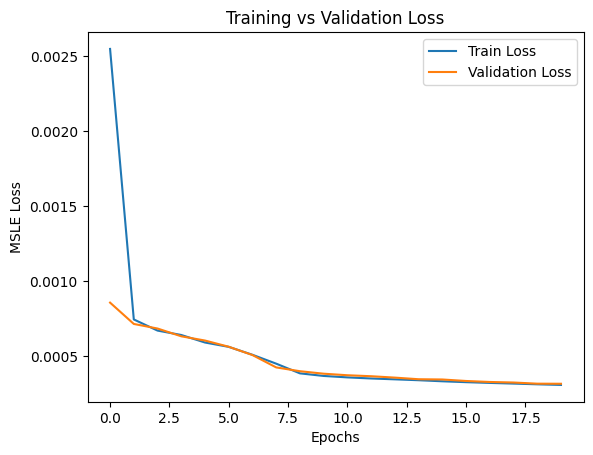

In [11]:

plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSLE Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [12]:

def find_threshold(model, x_train_scaled):
    reconstructions = model.predict(x_train_scaled)
    reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
    threshold = np.mean(reconstruction_errors.numpy()) 
    return threshold

threshold = find_threshold(model, X_train_scaled)
print("Threshold for anomaly detection:", threshold)


2025-10-09 10:40:14.823312: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27294120 exceeds 10% of free system memory.


7108/7108 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


2025-10-09 10:40:32.504461: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27294120 exceeds 10% of free system memory.
2025-10-09 10:40:35.530110: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 54588240 exceeds 10% of free system memory.


Threshold for anomaly detection: 0.0007380129579332725


In [20]:
reconstruction_errors.numpy()

array([0.00012126, 0.00038176, 0.00128831, ..., 0.00055502, 0.00016848,
       0.00046344])

In [13]:

reconstructions = model.predict(X_test_scaled)
reconstruction_errors = tf.keras.losses.msle(reconstructions, X_test_scaled)

# Predict anomalies: fraud if error > threshold
y_pred = (reconstruction_errors.numpy() > threshold).astype(int)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", acc)


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Accuracy on Test Set: 0.9422773076788035


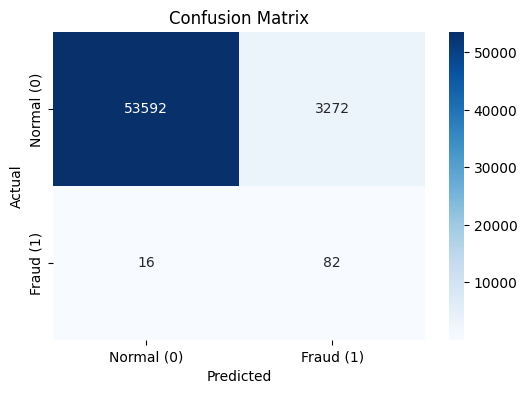

Classification Report:

              precision    recall  f1-score   support

      Normal       1.00      0.94      0.97     56864
       Fraud       0.02      0.84      0.05        98

    accuracy                           0.94     56962
   macro avg       0.51      0.89      0.51     56962
weighted avg       1.00      0.94      0.97     56962



In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal (0)", "Fraud (1)"],
            yticklabels=["Normal (0)", "Fraud (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Normal", "Fraud"]))
